# Trigonalisation

## Exercice

Soit $a\in\mathbb{R}$, on considère la matrice
$$M(a)=\left[\begin{matrix}2 - a & a^{2} - 1 & - a^{2} + a\\ 3 - 3 a & a^{2} & - a^{2} + 3 a - 2\\ 2 - 2 a & a^{2} - 1 & - a^{2} + 2 a\end{matrix}\right]$$
1. Quelles sont les valeurs propres de $M(a)$ ?
1. Pour quelle(s) valeur(s) de $a$ la matrice $M(a)$ est-elle diagonalisable ?
1. Lorsque $M(a)$ *n'est pas* diagonalisable, la trigonaliser.

In [1]:
import sympy as sp
sp.init_printing()
a = sp.symbols('a', real=True)
M = sp.Matrix([[2 - a, a**2 - 1, -a**2 + a], [3 - 3*a, a**2, -
              a**2 + 3*a - 2], [2 - 2*a, a**2 - 1, -a**2 + 2*a]])

**Question 1**

On demande les *valeurs propres*, le polynôme caractéristique est la réponse la plus simple.

In [2]:
X = sp.symbols('X')
(M-X*sp.eye(3)).det().factor()

**Question 2**

On demande les *dimensions* des espaces propres. On a deux cas
1. $a=1$, mais alors $M=I_3$, elle est diagonalisable.
1. $a\ne 1$, il faut calculer la dimension de $E_A(1)$ car 1 est de multiplicité 2.

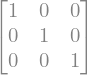

In [3]:
# a=1
M.subs({a: 1})

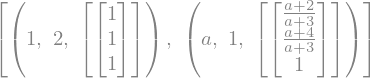

In [4]:
# a différent de 1
M.eigenvects()

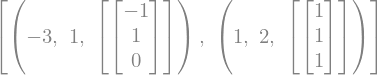

In [5]:
# On remarque que a=-3 n'est pas un cas particulier
M.subs({a: -3}).eigenvects()

<div class="alert alert-danger">
 
Ce résultat est faux ! 

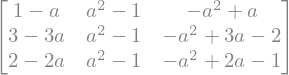

In [6]:
M-sp.eye(3)

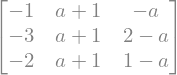

In [7]:
M1 = (1/(a-1)*_).applyfunc(sp.simplify)
M1

On voit immédiatement que $a=-1$ est un cas particulier.

In [8]:
# a=-1
M1.subs({a: -1}).rank()

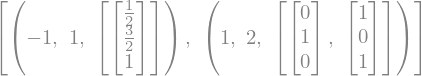

In [9]:
M.subs({a: -1}).eigenvects()

La matrice $M(-1)$ est diagonaliable.

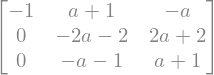

In [10]:
# a différent de -1
M1.elementary_row_op(
    'n->n+km', 1, -3, 0).elementary_row_op('n->n+km', 2, -2, 0)

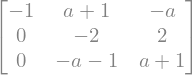

In [11]:
_.elementary_row_op('n->kn', 1, 1/(a+1)).applyfunc(sp.simplify)

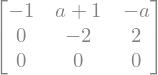

In [12]:
_.elementary_row_op('n->n+km', 2, -(a+1)/2, 1)

Le rang est clairement 2, donc l'espace propre $E_{M(a)}(1)$ est de dimension 1 alors que la multiplicité de 1 est 2. La matrice *n'est pas* diagonalisable.

**Question 3**

Comme on a travaillé uniquement sur les lignes, on pourrait trouver facilement un vecteur propre qui engendre l'espace propre associé à 1.

In [13]:
# a différent de 1 et de -1
x, y, z = sp.symbols('x y z', real=True)
MX = sp.Matrix([x, y, z])
sp.solve(_@MX, [x, y, z])

Le vecteur $(1,1,1)$ convient (ce qui était donné dans le résultat faux). Pour le vecteur propre dirigeant l'espace propre associé à $a$, on trouve $(a+2, a+4, a+3)$ (voir la cellule 4).

In [14]:
# On complète par un vecteur de la base canonique
P = sp.Matrix([[1, 1, 1], [a+2, a+4, a+3], [1, 0, 0]]).transpose()

In [15]:
P.det()

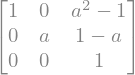

In [16]:
# Il convient ! On obtient bien une base
(P.inv()@M@P).applyfunc(sp.simplify)

## Exercice

1. Programmer une fonction qui trigonalise une matrice donnée (on appliquera l'algorithme du cours).
1. L'appliquer à la matrice
$$M=\left[\begin{matrix}4 & -2 & 0 & 2 & -1 & 0\\4 & 0 & -2 & 2 & 0 & -1\\2 & -2 & 2 & 1 & -1 & 1\\-2 & 1 & 0 & 0 & 0 & 0\\-2 & 0 & 1 & 0 & 0 & 0\\-1 & 1 & -1 & 0 & 0 & 0\end{matrix}\right]$$

In [17]:
M = sp.Matrix([[4, -2, 0, 2, -1, 0], [4, 0, -2, 2, 0, -1], [2, -2, 2, 1, -1, 1],
              [-2, 1, 0, 0, 0, 0], [-2, 0, 1, 0, 0, 0], [-1, 1, -1, 0, 0, 0]])

**Question 1**

On suit l'algorithme du cours.

In [18]:
def trigonalise(M):
    n, p = M.shape
    assert n==p
    if n==1:
        return sp.eye(1)
    # Recherche d'un vecteur propre
    step1 = M.eigenvects()
    E1 = step1[0][2][0]
    # Vérification qu'on obtient une matrice inversible
    for i in range(n):
        P = sp.zeros(n, n)
        P[:, 0] = E1
        l = list(range(n))
        l.remove(i)
        P[:, 1:] = sp.eye(n)[:, l]
        if P.det() != 0:
            break
    # Récurrence
    Q = trigonalise((P.inv()@M@P)[1:, 1:])
    QQ = sp.Matrix(sp.BlockDiagMatrix(sp.eye(1), Q))
    return P@QQ

**Question 2**

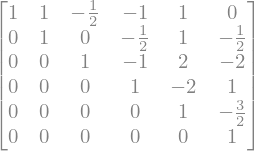

In [19]:
P = trigonalise(M)
P.inv()@M@P

## Exercice

Faire l'exercice 3.2.4

On va procéder par récurrence sur $n$. 
1. Pour $n=1$ le résultat est évident, car tous les endomorphismes d'un espace vectoriel de dimension 1 sont trogonalisables.
1. Supposons le résultat vrai si $\dim(E)=n$ et prenons un $\mathbb{C}$-espace vectoriel $E$ de dimension $n+1$ et deux endomorphismes $u$ et $v$ tels que $u\circ v =0_{_{\mathscr{L}(E)}}$. L'idée de la démonstration est simple. On commence par trouver un vecteur propre *commun* aux deux endormorphismes et on essaye d'appliquer la récurrence.
    1. *Recherche d'un vecteur propre commun*. Si $x\ne 0_E$ et $(\lambda,\mu)\in\mathbb{C}^2$ sont tels que
    $u(x)=\lambda.x$ et $v(x)=\mu.x$, alors $\lambda\,\mu=0$. On a trois cas à considérer.
        1. $\lambda=\mu=0$, mais alors $x\in\mathrm{Ker}(u)\cap\mathrm{Ker}(v)$, mais on ne nous dit rien sur cette intersection.
        1. $\mu=0$ et $\lambda\ne0$, mais alors, la relation $(u\circ v)(x)=0_E$ n'apporte aucune information sur $x$.
        1. $\lambda=0$ et $\mu\ne0$, alors $x\in\mathrm{Im}(v)\cap\mathrm{Ker}(u)$, or on sait que (car $u\circ v=0$)
        $$\mathrm{Im}(v)\subset \mathrm{Ker}(u)\;!$$
        
    Le raisonnement en découle. $\mathrm{Im}(v)$ est à la fois stable par $u$ et $v$ et on a
    $$u\left|_{_{\mathrm{Im}(v)}}^{^{\mathrm{Im}(v}}\right.=0_{_{\mathrm{Im}(v)}}$$
    Soit $\mu$ une valeur propre de $v\left|_{_{\mathrm{Im}(v)}}^{^{\mathrm{Im}(v}}\right.$ (qui existe car on est dans $\mathbb{C}$) et $x$ un vecteur propre associé, on a alors
    $$u(x)=0_E\quad\text{et}\quad v(x)=\mu.x$$
    1. *Utilisation de la récurrence (hérédité)* Soit $E_1$ un supplémentaire de $\mathbb{C}.x$ dans $E$, on a donc
    $$E=\mathbb{C}.x\oplus E_1$$
    et $\mathcal{B}$ une base *adaptée* à cette somme directe, on a alors
    $$\mathrm{Mat}(u,\mathcal{B})=\left[\begin{array}{c|c} 0& L_1 \\ \hline 0_{n,1}& A_1\end{array}\right]\quad\text{et}\quad \mathrm{Mat}(v,\mathcal{B})=\left[\begin{array}{c|c} \mu& L_2 \\ \hline 0_{n,1}& A_2\end{array}\right]$$
    où $L_1$ et $L_2$ sont des matrices lignes $1\times n$.
        1. La relation $u\circ v=0$ nous donne alors que $A_1\cdot A_2=0_{\mathrm{M}_n(\mathbb{C})}$.
        1. L'hypothèse de récurrence nous donne l'existence d'une matrice $P\in\mathrm{GL}_n(\mathbb{C})$ telle que
        $$P^{-1}\cdot A_1\cdot P\in\mathrm{T}_n^+(\mathbb{C})\quad\text{et}\quad P^{-1}\cdot A_2\cdot P\in\mathrm{T}_n^+(\mathbb{C})$$
        1. On peut conclure en posant
        $$Q=\left[\begin{array}{c|c} 1& 0_{1,n}\\ \hline 0_{n,1}&P\end{array}\right]$$
        On a alors
        $$Q^{-1}\cdot \left[\begin{array}{c|c} 0& L_1 \\ \hline 0_{n,1}& A_1\end{array}\right]\cdot Q\in\mathrm{T}_{n+1}^+(\mathbb{C})\quad\text{et}\quad Q^{-1}\cdot \left[\begin{array}{c|c} \mu& L_2 \\ \hline 0_{n,1}& A_2\end{array}\right]\cdot Q\in \mathrm{T}_{n+1}^+(\mathbb{C})$$